In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("train.csv")
print(df.dtypes)

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object


In [19]:
#create new varible - pure breed
df['PureBreed'] = np.where((df['Breed1'] != 307)&(df['Breed2'] == 0), 1, 0)

#create new varible - pure color
df['PureColor'] = np.where((df['Color2'] != 0)&(df['Color3'] != 0), 1, 0)


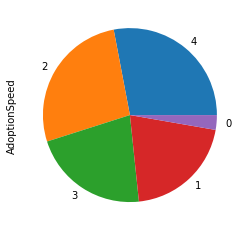

In [16]:
#df['AdoptionSpeed'].value_counts().plot(kind='pie')
df['AdoptionSpeed'].value_counts().plot(kind='pie')


In [20]:
#create new variable - FastAdoption
df['FastAdoption'] = np.where(df['AdoptionSpeed'] == 0, '1', '0')
df['FastAdoption'] = df['FastAdoption'].astype(int)

#FurLength, Type, Breed
#CM = df.corr()
#CM.loc['FastAdoption'].sort_values(ascending=False)

In [21]:
print(df.dtypes)

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
PureBreed          int64
FastAdoption       int64
PureColor          int64
dtype: object


In [23]:
df1 = df.drop(["Name", "Breed2", "Color2", "Color3", "RescuerID", "Description", "PetID"], axis=1)

In [31]:
#df.groupby('FastAdoption').FurLength.mean().plot(kind='bar')

In [24]:
df1.groupby('FastAdoption').mean()

,Type,Age,Breed1,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,PureBreed,PureColor
FastAdoption,,,,,,,,,,,,,,,,,,,
0,1.454022,10.452102,265.671124,1.777686,2.229445,1.864431,1.461976,1.729685,1.556333,1.911815,1.036344,1.580608,21.236783,41345.987520,0.056641,3.905095,2.587191,0.413358,0.291641
1,1.585366,10.451220,251.097561,1.721951,2.402439,1.775610,1.663415,1.785366,1.643902,2.000000,1.046341,1.414634,22.085366,41347.480488,0.060976,3.324390,0.000000,0.485366,0.331707


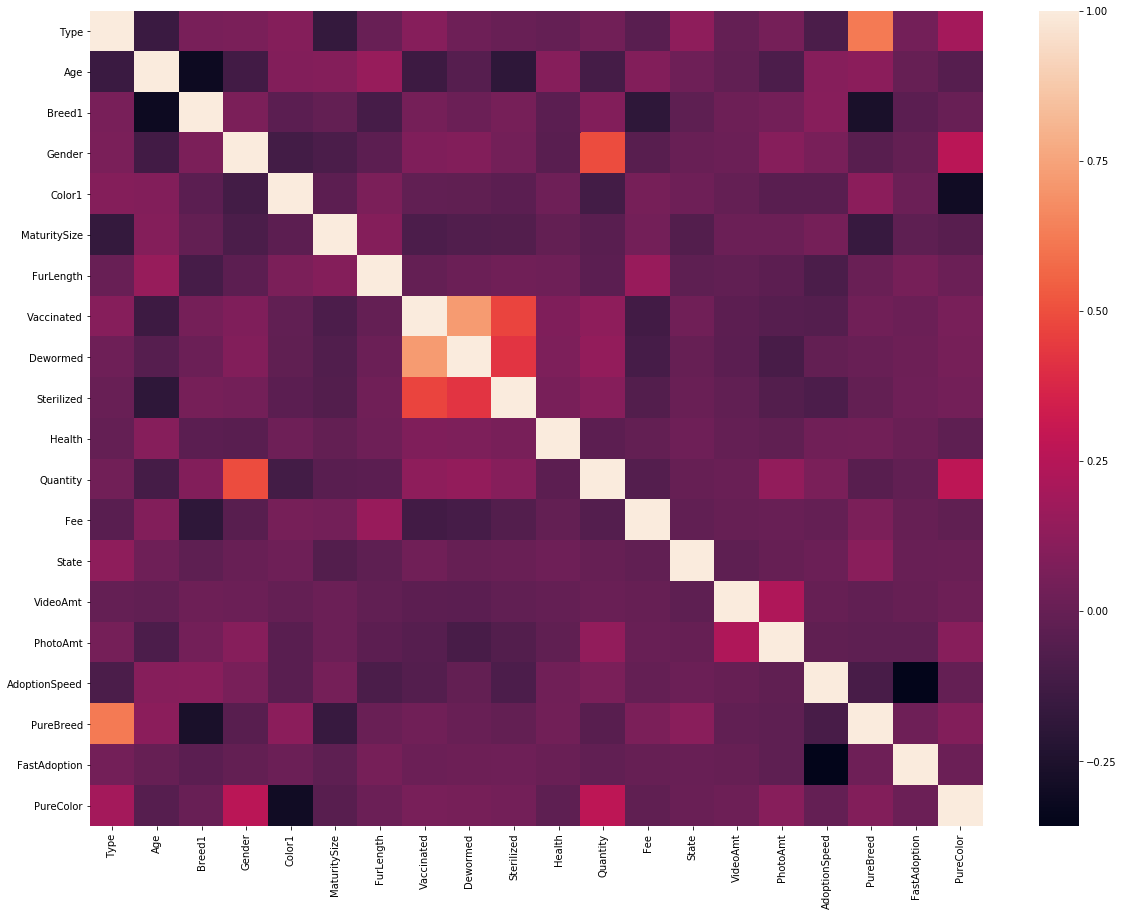

In [30]:
import seaborn as sn
import matplotlib.pyplot as plt
corr = df1.corr()
plt.subplots(figsize=(20,15))
sn.heatmap(corr)

In [32]:
#FurLength, Type, Breed, PhotoAmt, MaturitySize

corr.loc['FastAdoption'].sort_values(ascending=False)

FastAdoption     1.000000
FurLength        0.054841
Type             0.042997
Sterilized       0.025403
PureBreed        0.023832
Dewormed         0.020526
Color1           0.016167
PureColor        0.014361
Vaccinated       0.013602
Health           0.008172
State            0.007505
VideoAmt         0.002042
Fee              0.001765
Age             -0.000008
Gender          -0.013337
Quantity        -0.018384
MaturitySize    -0.026437
PhotoAmt        -0.027155
Breed1          -0.039577
AdoptionSpeed   -0.358423
Name: FastAdoption, dtype: float64

In [33]:
#T Test 
from scipy.stats import ttest_ind
ttest_ind(*df1.groupby('FastAdoption')['FurLength'].apply(lambda x:list(x)))

Ttest_indResult(statistic=-6.724738548793734, pvalue=1.8226999673118984e-11)

In [34]:
ttest_ind(*df1.groupby('FastAdoption')['Type'].apply(lambda x:list(x)))

Ttest_indResult(statistic=-5.269270342060348, pvalue=1.3886378417916394e-07)

In [35]:
ttest_ind(*df1.groupby('FastAdoption')['Breed1'].apply(lambda x:list(x)))

Ttest_indResult(statistic=4.849538670906782, pvalue=1.2499084043436661e-06)

In [36]:
ttest_ind(*df1.groupby('FastAdoption')['PhotoAmt'].apply(lambda x:list(x)))

Ttest_indResult(statistic=3.3259774698548794, pvalue=0.0008832068996300674)

In [37]:
ttest_ind(*df1.groupby('FastAdoption')['MaturitySize'].apply(lambda x:list(x)))

Ttest_indResult(statistic=3.2380100367728155, pvalue=0.0012062839239356236)

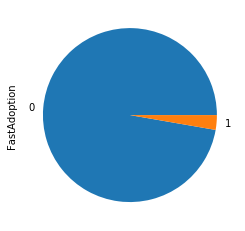

In [41]:
df1['FastAdoption'].value_counts().plot(kind='pie')

In [38]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
!pip install imblearn
from imblearn.over_sampling import SMOTE

In [42]:
#Balanced data
from imblearn.combine import SMOTEENN
from collections import Counter

x = df1.loc[:, df1.columns != 'FastAdoption']
y = df1.loc[:, df1.columns == 'FastAdoption']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

smote_enn = SMOTEENN(sampling_strategy='minority',random_state=100)
x_resampled, y_resampled = smote_enn.fit_resample(x_train, y_train)
print(Counter(y_resampled))

Counter({'FastAdoption': 1})


In [43]:
#logistic regression
#separation occurs when there is a category or range of a predictor with only one value of the response. 
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

//anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


PerfectSeparationError: Perfect separation detected, results not available

In [54]:
#Random Forests for adoption speed 1-4
ndf = df1[df1.AdoptionSpeed != 0]
df2 = ndf.drop(["FastAdoption"], axis=1)
df2

,Type,Age,Breed1,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,PureBreed,PureColor
0,2,3,299,1,1,1,1,2,2,2,1,1,100,41326,0,1.0,2,1,0
2,1,1,307,1,2,2,2,1,1,2,1,1,0,41326,0,7.0,3,0,0
3,1,4,307,2,1,2,1,1,1,2,1,1,150,41401,0,8.0,2,0,0
4,1,1,307,1,1,2,1,2,2,2,1,1,0,41326,0,3.0,2,0,0
5,2,3,266,2,5,2,1,2,2,2,1,1,0,41326,0,2.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,2,266,3,1,2,2,2,2,2,1,4,0,41326,0,3.0,2,1,0
14989,2,60,265,3,1,2,2,1,1,1,1,2,0,41326,0,3.0,4,0,1
14990,2,2,265,3,5,3,2,2,1,3,1,5,30,41326,0,5.0,3,0,1
14991,2,9,266,2,4,1,1,1,1,1,1,1,0,41336,0,3.0,4,1,0


In [55]:
x = df2.loc[:, df2.columns != 'AdoptionSpeed']
y = df2.loc[:, df2.columns == 'AdoptionSpeed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [56]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [57]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4018285714285714


In [59]:
#make prediction
clf.predict([[1, 3, 306, 2,1,1,1,1,1,1,1,1,0,41326, 0,3,2,1,]])

array([4])

###

In [72]:
nndf = df2.drop(["AdoptionSpeed"], axis=1)
li1 = list(nndf.columns) 


['Type',
 'Age',
 'Breed1',
 'Gender',
 'Color1',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Dewormed',
 'Sterilized',
 'Health',
 'Quantity',
 'Fee',
 'State',
 'VideoAmt',
 'PhotoAmt',
 'PureBreed',
 'PureColor']

In [78]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
feature_imp = pd.Series(clf.feature_importances_,index=li1).sort_values(ascending=False)

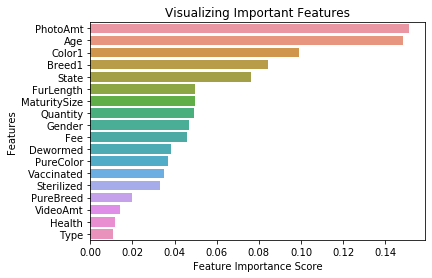

In [80]:

%matplotlib inline
# Creating a bar plot
sn.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [83]:
x = df2[['PhotoAmt', 'Age','Color1','Breed1','State','FurLength','MaturitySize','Quantity','Gender','Fee','Dewormed','PureColor','Vaccinated','Sterilized']]
y = df2['AdoptionSpeed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4150857142857143


<h3>Modeling on cats & dogs seperately

In [264]:
CT = pd.read_csv("cat_training_data.csv")
DT = pd.read_csv("dog_training_data.csv")
CT.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'Age', 'Quantity', 'Fee', 'PhotoAmt',
       'Gender_Male', 'Gender_Mix', 'MaturitySize_Large',
       'MaturitySize_Medium', 'MaturitySize_Small', 'Colors_Black, Brown',
       'Colors_Black, Cream', 'Colors_Black, Golden',
       'Colors_Black, Gray', 'Colors_Black, White',
       'Colors_Black, Yellow', 'Colors_Brown', 'Colors_Brown, Cream',
       'Colors_Brown, Golden', 'Colors_Brown, Gray',
       'Colors_Brown, White', 'Colors_Brown, Yellow', 'Colors_Cream',
       'Colors_Cream, Gray', 'Colors_Cream, White', 'Colors_Golden',
       'Colors_Golden, Cream', 'Colors_Golden, Gray',
       'Colors_Golden, White', 'Colors_Golden, Yellow', 'Colors_Gray',
       'Colors_Gray, White', 'Colors_White', 'Colors_Yellow',
       'Colors_Yellow, Cream', 'Colors_Yellow, Gray',
       'Colors_Yellow, White', 'FurLength_Medium', 'FurLength_Short',
       'Vaccinated_Not_Sure', 'Vaccinated_Yes', 'Health_Minor_Injury',
       'Dewormed_Not_Sure', 'Dewormed_Yes'

#one hot encode
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

CT = one_hot(CT, CT.loc[:, ["Emotion"]].columns)
CT.columns.values

In [265]:
CT = CT.drop(['Unnamed: 0', 'Unnamed: 0.1','Emotion','PetID','Breed'], axis=1)
print(CT.dtypes)

Age                       int64
Quantity                  int64
Fee                       int64
PhotoAmt                float64
Gender_Male               int64
                         ...   
Emotion_sad,scared        int64
Emotion_sad,timid         int64
Emotion_scared            int64
Emotion_scared,timid      int64
Emotion_timid             int64
Length: 143, dtype: object


In [225]:
x = CT.loc[:, CT.columns != 'AdoptionSpeed']
y = CT.loc[:, CT.columns == 'AdoptionSpeed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.3103448275862069


In [226]:
nct = CT.drop(["AdoptionSpeed"], axis=1)
list1 = list(nct.columns) 
list1

['Age',
 'Quantity',
 'Fee',
 'PhotoAmt',
 'Gender_Male',
 'Gender_Mix',
 'MaturitySize_Large',
 'MaturitySize_Medium',
 'MaturitySize_Small',
 'Colors_Black, Brown',
 'Colors_Black, Cream',
 'Colors_Black, Golden',
 'Colors_Black, Gray',
 'Colors_Black, White',
 'Colors_Black, Yellow',
 'Colors_Brown',
 'Colors_Brown, Cream',
 'Colors_Brown, Golden',
 'Colors_Brown, Gray',
 'Colors_Brown, White',
 'Colors_Brown, Yellow',
 'Colors_Cream',
 'Colors_Cream, Gray',
 'Colors_Cream, White',
 'Colors_Golden',
 'Colors_Golden, Cream',
 'Colors_Golden, Gray',
 'Colors_Golden, White',
 'Colors_Golden, Yellow',
 'Colors_Gray',
 'Colors_Gray, White',
 'Colors_White',
 'Colors_Yellow',
 'Colors_Yellow, Cream',
 'Colors_Yellow, Gray',
 'Colors_Yellow, White',
 'FurLength_Medium',
 'FurLength_Short',
 'Vaccinated_Not_Sure',
 'Vaccinated_Yes',
 'Health_Minor_Injury',
 'Dewormed_Not_Sure',
 'Dewormed_Yes',
 'Sterilized_Not_Sure',
 'Sterilized_Yes',
 'PetScore',
 'Breed_American Curl',
 'Breed_American 

In [227]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
feature_imp = pd.Series(clf.feature_importances_,index=list1).sort_values(ascending=False)

print(feature_imp.to_string())

Age                                                    0.101555
PhotoAmt                                               0.089915
PetScore                                               0.076698
Quantity                                               0.035877
Fee                                                    0.029010
Gender_Male                                            0.028444
Dewormed_Yes                                           0.026868
Breed_Mixed Breed                                      0.025344
Vaccinated_Yes                                         0.024865
Breed_Domestic Short Hair                              0.024373
FurLength_Short                                        0.024296
MaturitySize_Medium                                    0.024044
MaturitySize_Small                                     0.022057
Colors_Black, Brown                                    0.021304
FurLength_Medium                                       0.021197
Colors_Black, White                     

In [230]:
FI1 = feature_imp.to_frame(name = 'score')
FI1 = FI1.drop(FI1[FI1.score < 0.01].index)
NFI = FI1.drop('score', axis = 1)
NFI


""
Age
PhotoAmt
PetScore
Quantity
Fee
Gender_Male
Dewormed_Yes
Breed_Mixed Breed
Vaccinated_Yes
Breed_Domestic Short Hair


In [266]:
#drop variables <0.01
x = CT[['Age','PhotoAmt','PetScore','Quantity','Dewormed_Yes','Fee','Gender_Male','Breed_Mixed Breed','Vaccinated_Yes',
        'Breed_Domestic Short Hair','FurLength_Short','MaturitySize_Medium','MaturitySize_Small','Colors_Black, Brown',
        'FurLength_Medium','Colors_Black, White','Emotion_playful','Emotion_timid','Sterilized_Yes','Gender_Mix','Emotion_happy',
        'Emotion_sad','Breed_Domestic Medium Hair','Sterilized_Not_Sure','Colors_Black, Yellow','Colors_Black, Gray',
        'MaturitySize_Large','Colors_Gray, White','Emotion_scared']]
y = CT['AdoptionSpeed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3793103448275862


In [267]:
CV = pd.read_csv("cat_test_data.csv")

CV = CV[['Age','PhotoAmt','PetScore','Quantity','Dewormed_Yes','Fee','Gender_Male','Breed_Mixed Breed','Vaccinated_Yes',
        'Breed_Domestic Short Hair','FurLength_Short','MaturitySize_Medium','MaturitySize_Small','Colors_Black, Brown',
        'FurLength_Medium','Colors_Black, White','Emotion_playful','Emotion_timid','Sterilized_Yes','Gender_Mix','Emotion_happy',
        'Emotion_sad','Breed_Domestic Medium Hair','Sterilized_Not_Sure','Colors_Black, Yellow','Colors_Black, Gray',
        'MaturitySize_Large','Colors_Gray, White','Emotion_scared']]

CV['RF'] = clf.predict(CV)
CV.to_csv('cat_vicky_test.csv') 

In [237]:
#drop variables <0.02
x = CT[['Age','PhotoAmt','PetScore','Quantity','Dewormed_Yes','Fee','Gender_Male','Breed_Mixed Breed','Vaccinated_Yes',
        'Breed_Domestic Short Hair','FurLength_Short','MaturitySize_Medium','MaturitySize_Small','Colors_Black, Brown',
        'FurLength_Medium','Colors_Black, White']]
y = CT['AdoptionSpeed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.36398467432950193


In [146]:
# Use the forest's predict method on the test data
#rfc_model_3 = RandomForestClassifier(n_estimators=200)
#rfc_model_3.predict(X_test)
#X_test['survived'] = rfc_model_3.predict(X_test)

#'Vaccinated_Yes','Sterilized_Yes','Colors_Black, White','Emotion_timid','Colors_Black, Brown','Breed_Domestic Medium Hair',
        #'Sterilized_Not_Sure','Emotion_mean','Colors_Black, Gray','Emotion_scared','Emotion_happy','Emotion_sad','Gender_Mix',
        #'Colors_White','Colors_Gray, White','Dewormed_Not_Sure','Vaccinated_Not_Sure','Health_Minor_Injury','Colors_Black, Yellow'

In [187]:
CV = pd.read_csv("cat_valiation_data.csv")

#one hot encode
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

CV = one_hot(CV, CV.loc[:, ["Emotion"]].columns)
CV = CV[['Age','PhotoAmt','PetScore','Quantity','Dewormed_Yes','Fee','Gender_Male','Emotion_playful','MaturitySize_Medium',
        'Breed_Domestic Short Hair','MaturitySize_Small','Emotion_content','Breed_Mixed Breed','FurLength_Short','FurLength_Medium']]
CV

,Age,PhotoAmt,PetScore,Quantity,Dewormed_Yes,Fee,Gender_Male,Emotion_playful,MaturitySize_Medium,Breed_Domestic Short Hair,MaturitySize_Small,Emotion_content,Breed_Mixed Breed,FurLength_Short,FurLength_Medium
0,3,9,9.0,1,1,0,0,0,1,0,0,0,0,1,0
1,2,5,7.0,1,1,0,1,0,1,1,0,1,0,1,0
2,5,5,4.0,1,0,0,1,0,1,0,0,0,0,0,1
3,3,2,3.5,1,1,0,1,0,1,1,0,0,0,1,0
4,4,7,5.5,1,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2,3,10.0,1,1,15,0,1,1,0,0,0,1,0,1
118,11,4,7.0,1,1,0,0,0,1,1,0,1,0,1,0
119,1,5,7.5,1,0,0,0,0,1,0,0,0,0,0,1
120,18,1,7.0,1,1,0,1,0,1,0,0,0,1,1,0


In [188]:
CV['RF'] = clf.predict(CV)

In [192]:
CV.to_csv('cat_Vicky.csv') 

In [199]:
#DOGS
#one hot encode
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

DT = one_hot(DT, DT.loc[:, ["Emotion"]].columns)
DT = DT.drop(["Emotion"], axis=1)
DT.columns.values

array(['Age', 'Quantity', 'Fee', 'PhotoAmt', 'AdoptionSpeed', 'PetScore',
       'Type_Dog', 'Gender_Male', 'Gender_Mix', 'MaturitySize_Large',
       'MaturitySize_Medium', 'MaturitySize_Small', 'Breed_American Curl',
       'Breed_American Shorthair', 'Breed_Beagle',
       'Breed_Belgian Shepherd Malinois', 'Breed_Bengal', 'Breed_Bobtail',
       'Breed_Bombay', 'Breed_Boston Terrier', 'Breed_British Shorthair',
       'Breed_Bull Terrier', 'Breed_Calico', 'Breed_Chihuahua',
       'Breed_Cocker Spaniel', 'Breed_Doberman Pinscher',
       'Breed_Domestic Long Hair', 'Breed_Domestic Medium Hair',
       'Breed_Domestic Short Hair', 'Breed_Egyptian Mau',
       'Breed_English Bulldog', 'Breed_English Cocker Spaniel',
       'Breed_Exotic Shorthair',
       'Breed_Extra-Toes Cat (Hemingway Polydactyl)',
       'Breed_German Pinscher', 'Breed_German Shepherd Dog',
       'Breed_Golden Retriever', 'Breed_Great Dane', 'Breed_Husky',
       'Breed_Jack Russell Terrier',
       'Breed_Jack 

In [268]:
DT = DT.drop(['Unnamed: 0', 'Unnamed: 0.1','Emotion','PetID','Breed'], axis=1)

In [255]:
x = DT.loc[:, DT.columns != 'AdoptionSpeed']
y = DT.loc[:, DT.columns == 'AdoptionSpeed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.3581081081081081


In [256]:
ndt = DT.drop(["AdoptionSpeed"], axis=1)
list2 = list(ndt.columns) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
feature_imp = pd.Series(clf.feature_importances_,index=list2).sort_values(ascending=False)

print(feature_imp.to_string())

Age                                                    0.106466
PhotoAmt                                               0.095585
PetScore                                               0.083071
Quantity                                               0.043501
Gender_Male                                            0.033800
Fee                                                    0.032729
Colors_Black, Brown                                    0.030810
Dewormed_Yes                                           0.028129
Emotion_happy                                          0.026808
Sterilized_Yes                                         0.025977
Vaccinated_Yes                                         0.025742
Breed_Mixed Breed                                      0.024199
FurLength_Short                                        0.023859
Emotion_sad                                            0.023177
Colors_Brown                                           0.021199
FurLength_Medium                        

In [269]:
#drop variables < 0.01
x = DT[['Age','PhotoAmt','PetScore','Quantity','Dewormed_Yes','Fee','Gender_Male','Colors_Black, Brown','Emotion_happy',
        'Sterilized_Yes','Vaccinated_Yes','Breed_Mixed Breed','FurLength_Short','Emotion_sad','Colors_Brown',
        'FurLength_Medium','MaturitySize_Medium','Emotion_playful','Colors_Brown, White','Sterilized_Not_Sure',
        'Breed_Domestic Short Hair','Colors_Black, White','MaturitySize_Small','Gender_Mix','Vaccinated_Not_Sure',
        'Colors_Brown, Cream','Emotion_timid','Dewormed_Not_Sure','Colors_Cream','Colors_White','MaturitySize_Large']]
y = DT['AdoptionSpeed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3310810810810811


In [270]:
DV = pd.read_csv("dog_test_data.csv")

DV = DV[['Age','PhotoAmt','PetScore','Quantity','Dewormed_Yes','Fee','Gender_Male','Colors_Black, Brown','Emotion_happy',
        'Sterilized_Yes','Vaccinated_Yes','Breed_Mixed Breed','FurLength_Short','Emotion_sad','Colors_Brown',
        'FurLength_Medium','MaturitySize_Medium','Emotion_playful','Colors_Brown, White','Sterilized_Not_Sure',
        'Breed_Domestic Short Hair','Colors_Black, White','MaturitySize_Small','Gender_Mix','Vaccinated_Not_Sure',
        'Colors_Brown, Cream','Emotion_timid','Dewormed_Not_Sure','Colors_Cream','Colors_White','MaturitySize_Large']]

DV['RF'] = clf.predict(DV)
DV.to_csv('dog_vicky_test.csv') 

In [209]:
DV = pd.read_csv("dog_valiation_data.csv")

#one hot encode
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

DV = one_hot(DV, DV.loc[:, ["Emotion"]].columns)
DV = DV[['Age','PhotoAmt','PetScore','Quantity','Dewormed_Yes','Fee','Gender_Male','Emotion_playful','MaturitySize_Medium',
        'Emotion_content','FurLength_Short','FurLength_Medium','Sterilized_Yes','Colors_Black, Brown','Vaccinated_Yes',
       'Emotion_sad','Emotion_happy','Sterilized_Not_Sure','Colors_Brown','Breed_Mixed Breed','Vaccinated_Not_Sure',
       'Colors_Black, White','Emotion_timid','Colors_Brown, White','Gender_Mix','MaturitySize_Small','Dewormed_Not_Sure',
       'Emotion_scared','Colors_White','Health_Minor_Injury']]
DV

,Age,PhotoAmt,PetScore,Quantity,Dewormed_Yes,Fee,Gender_Male,Emotion_playful,MaturitySize_Medium,Emotion_content,...,Vaccinated_Not_Sure,"Colors_Black, White",Emotion_timid,"Colors_Brown, White",Gender_Mix,MaturitySize_Small,Dewormed_Not_Sure,Emotion_scared,Colors_White,Health_Minor_Injury
0,2,3,5.000000,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,3,6.000000,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,29,1,1.000000,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,8,6.666667,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,24,4,5.500000,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2,2,8.000000,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
127,2,4,9.000000,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
128,2,4,8.500000,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
129,5,5,7.000000,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [210]:
DV['RF'] = clf.predict(DV)
DV.to_csv('dog_Vicky.csv') 